In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split

%config InlineBackend.figure_format='svg'

G:\newage2\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
df=pd.read_csv('train_Data.csv')

In [3]:
df.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype='object')

In [4]:
df_min=df[df['9']==1]

In [5]:
df_min.to_csv('glass1_minority_train.csv',index=False)
df_min=pd.read_csv('glass1_minority_train.csv')

In [6]:
df_majority=df[df['9']==0]
df_majority.to_csv('glass1_majority_train.csv',index=False)
df_majority=pd.read_csv('glass1_majority_train.csv')

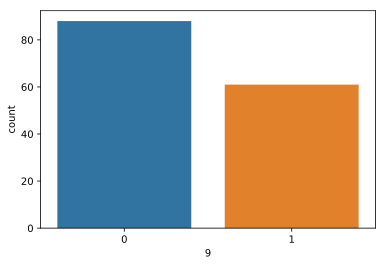

In [7]:
%matplotlib inline
sns.countplot(x='9',data=df)

In [8]:
def create_dataset(dataset,look_back=1):
    
    datax,datay=[],[]
    
    for i in range(len(dataset)-look_back-1):
        a=dataset[i:(i+look_back),:]
        datax.append(a)
        datay.append(dataset[i+look_back,:])
    
    return np.array(datax),np.array(datay)

In [9]:
df_minor=np.array(df_min)
scaler=MinMaxScaler(feature_range=(0,1))

df_minor=scaler.fit_transform(df_min)

x,y=create_dataset(df_minor,5)#5
print(x.shape)
print(y.shape)

(55, 5, 10)
(55, 10)


In [10]:
Xtrain,xtest,Ytrain,ytest=train_test_split(x,y,test_size=0.40,random_state=60)

In [11]:
model=Sequential()
model.add(LSTM(20,input_shape=(Xtrain.shape[1],Xtrain.shape[2])))#5
model.add(Dense(10))

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 20)                2480      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                210       
Total params: 2,690
Trainable params: 2,690
Non-trainable params: 0
_________________________________________________________________
None


In [12]:
model.compile(loss='mse',optimizer='adam')

In [13]:
history=model.fit(Xtrain,Ytrain,epochs=500,verbose=1)

Epoch 1/500
33/33 [==============================] - 5s 165ms/step - loss: 0.2462
Epoch 2/500
33/33 [==============================] - 0s 1ms/step - loss: 0.2367
Epoch 3/500
33/33 [==============================] - 0s 1ms/step - loss: 0.2272
Epoch 4/500
33/33 [==============================] - 0s 1ms/step - loss: 0.2175
Epoch 5/500
33/33 [==============================] - 0s 881us/step - loss: 0.2075
Epoch 6/500
33/33 [==============================] - 0s 881us/step - loss: 0.1978
Epoch 7/500
33/33 [==============================] - 0s 851us/step - loss: 0.1883
Epoch 8/500
33/33 [==============================] - 0s 912us/step - loss: 0.1793
Epoch 9/500
33/33 [==============================] - 0s 919us/step - loss: 0.1703
Epoch 10/500
33/33 [==============================] - 0s 911us/step - loss: 0.1613
Epoch 11/500
33/33 [==============================] - 0s 912us/step - loss: 0.1523
Epoch 12/500
33/33 [==============================] - 0s 881us/step - loss: 0.1436
Epoch 13/500
33/33 

33/33 [==============================] - 0s 972us/step - loss: 0.0405
Epoch 101/500
33/33 [==============================] - 0s 942us/step - loss: 0.0407
Epoch 102/500
33/33 [==============================] - 0s 972us/step - loss: 0.0407
Epoch 103/500
33/33 [==============================] - 0s 1ms/step - loss: 0.0406
Epoch 104/500
33/33 [==============================] - 0s 942us/step - loss: 0.0406
Epoch 105/500
33/33 [==============================] - 0s 911us/step - loss: 0.0407
Epoch 106/500
33/33 [==============================] - 0s 942us/step - loss: 0.0408
Epoch 107/500
33/33 [==============================] - 0s 1ms/step - loss: 0.0409
Epoch 108/500
33/33 [==============================] - 0s 2ms/step - loss: 0.0411
Epoch 109/500
33/33 [==============================] - 0s 1ms/step - loss: 0.0412
Epoch 110/500
33/33 [==============================] - 0s 1ms/step - loss: 0.0408
Epoch 111/500
33/33 [==============================] - 0s 1ms/step - loss: 0.0402
Epoch 112/500
33/3

33/33 [==============================] - 0s 1ms/step - loss: 0.0390
Epoch 199/500
33/33 [==============================] - 0s 1ms/step - loss: 0.0390
Epoch 200/500
33/33 [==============================] - 0s 1ms/step - loss: 0.0390
Epoch 201/500
33/33 [==============================] - 0s 1ms/step - loss: 0.0390
Epoch 202/500
33/33 [==============================] - 0s 2ms/step - loss: 0.0390
Epoch 203/500
33/33 [==============================] - 0s 2ms/step - loss: 0.0391
Epoch 204/500
33/33 [==============================] - 0s 1ms/step - loss: 0.0391
Epoch 205/500
33/33 [==============================] - 0s 1ms/step - loss: 0.0392
Epoch 206/500
33/33 [==============================] - 0s 1ms/step - loss: 0.0392
Epoch 207/500
33/33 [==============================] - 0s 1ms/step - loss: 0.0392
Epoch 208/500
33/33 [==============================] - 0s 1ms/step - loss: 0.0391
Epoch 209/500
33/33 [==============================] - 0s 1ms/step - loss: 0.0390
Epoch 210/500
33/33 [=========

33/33 [==============================] - 0s 1ms/step - loss: 0.0391
Epoch 299/500
33/33 [==============================] - 0s 1ms/step - loss: 0.0397
Epoch 300/500
33/33 [==============================] - 0s 1ms/step - loss: 0.0400
Epoch 301/500
33/33 [==============================] - 0s 1ms/step - loss: 0.0400
Epoch 302/500
33/33 [==============================] - 0s 1ms/step - loss: 0.0398
Epoch 303/500
33/33 [==============================] - 0s 1ms/step - loss: 0.0395
Epoch 304/500
33/33 [==============================] - 0s 1ms/step - loss: 0.0391
Epoch 305/500
33/33 [==============================] - 0s 1ms/step - loss: 0.0387
Epoch 306/500
33/33 [==============================] - 0s 1ms/step - loss: 0.0384
Epoch 307/500
33/33 [==============================] - 0s 1ms/step - loss: 0.0382
Epoch 308/500
33/33 [==============================] - 0s 1ms/step - loss: 0.0381
Epoch 309/500
33/33 [==============================] - 0s 1ms/step - loss: 0.0381
Epoch 310/500
33/33 [=========

33/33 [==============================] - 0s 1ms/step - loss: 0.0390
Epoch 398/500
33/33 [==============================] - 0s 1ms/step - loss: 0.0388
Epoch 399/500
33/33 [==============================] - 0s 1ms/step - loss: 0.0384
Epoch 400/500
33/33 [==============================] - 0s 1ms/step - loss: 0.0381
Epoch 401/500
33/33 [==============================] - 0s 1ms/step - loss: 0.0379
Epoch 402/500
33/33 [==============================] - 0s 1ms/step - loss: 0.0380
Epoch 403/500
33/33 [==============================] - 0s 1ms/step - loss: 0.0383
Epoch 404/500
33/33 [==============================] - 0s 1ms/step - loss: 0.0386
Epoch 405/500
33/33 [==============================] - 0s 1ms/step - loss: 0.0386
Epoch 406/500
33/33 [==============================] - 0s 1ms/step - loss: 0.0387
Epoch 407/500
33/33 [==============================] - 0s 1ms/step - loss: 0.0387
Epoch 408/500
33/33 [==============================] - 0s 1ms/step - loss: 0.0387
Epoch 409/500
33/33 [=========

33/33 [==============================] - 0s 1ms/step - loss: 0.0376
Epoch 498/500
33/33 [==============================] - 0s 1ms/step - loss: 0.0377
Epoch 499/500
33/33 [==============================] - 0s 1ms/step - loss: 0.0378
Epoch 500/500
33/33 [==============================] - 0s 1ms/step - loss: 0.0378


In [14]:
model.save('7-24-2019-glass1.h5')

In [15]:
Xtrain.shape

(33, 5, 10)

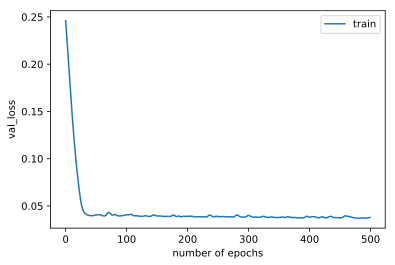

In [16]:
plt.plot(history.history['loss'],label='train')
#plt.plot(history.history['val_loss'],label='test')
plt.xlabel('number of epochs')
plt.ylabel('val_loss')
plt.legend()
#pyplot.savefig('LSTM training.png',dpi=300)
plt.show()

In [17]:
prediction=model.predict(xtest)

In [18]:
def draw_prediction(ytest,d,columns):
    
    _,axes=plt.subplots(len(columns),1,figsize=(10,20))
    
    for i,cols in enumerate(columns):
        
        axes[i].plot(ytest[:,i],label='real',color='blue')
        axes[i].plot(d[:,i],label='prediction',color='orange')
        #axes[i].set_xlabel='index'
        #axes[i].set_ylabel=cols
        axes[i].xlabel='index'
        axes[i].ylabel=cols

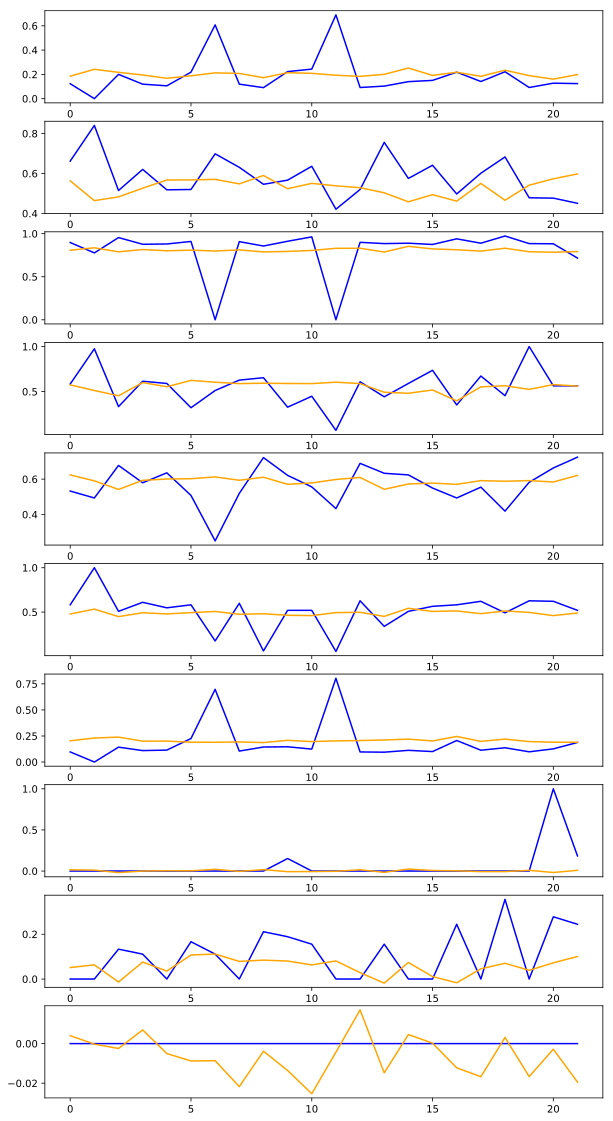

In [19]:
clmns=df.columns
draw_prediction(ytest,prediction,clmns)

In [20]:
prediction

array([[ 1.84886605e-01,  5.63167274e-01,  8.08086395e-01,
         5.74895740e-01,  6.23991966e-01,  4.78233367e-01,
         2.03605339e-01,  1.50534436e-02,  5.13546541e-02,
         4.01138328e-03],
       [ 2.41584092e-01,  4.64144588e-01,  8.36113274e-01,
         5.12220800e-01,  5.90358198e-01,  5.33390820e-01,
         2.30397686e-01,  1.14310365e-02,  6.33297339e-02,
        -2.81030312e-04],
       [ 2.16896102e-01,  4.82897222e-01,  7.89259493e-01,
         4.53693539e-01,  5.41768610e-01,  4.49038267e-01,
         2.39144027e-01, -1.87127665e-02, -1.33184120e-02,
        -2.45671906e-03],
       [ 1.95045263e-01,  5.26370287e-01,  8.15816462e-01,
         6.00530684e-01,  5.93464792e-01,  4.92504627e-01,
         2.00171232e-01,  1.41780823e-04,  7.56522343e-02,
         6.90655224e-03],
       [ 1.67739332e-01,  5.67602038e-01,  8.01414788e-01,
         5.53867280e-01,  6.00776196e-01,  4.79193181e-01,
         2.00894549e-01,  4.03178856e-03,  3.56027707e-02,
        -5.

In [21]:
prediction2=scaler.inverse_transform(prediction)

In [22]:
ytest2=scaler.inverse_transform(ytest)

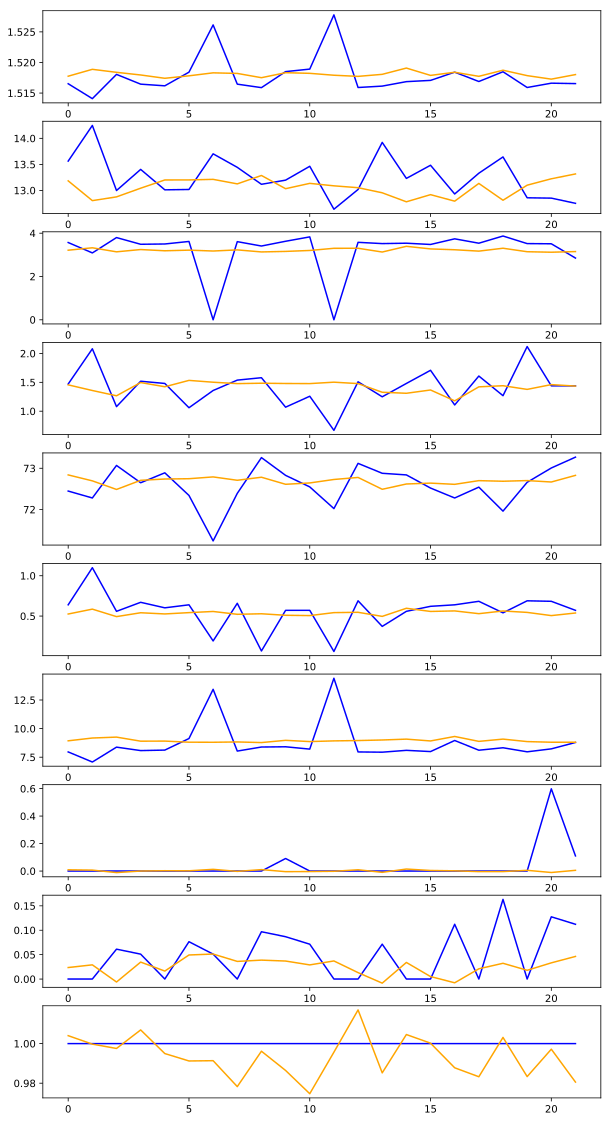

In [23]:
draw_prediction(ytest2,prediction2,clmns)

In [24]:
prediction

array([[ 1.84886605e-01,  5.63167274e-01,  8.08086395e-01,
         5.74895740e-01,  6.23991966e-01,  4.78233367e-01,
         2.03605339e-01,  1.50534436e-02,  5.13546541e-02,
         4.01138328e-03],
       [ 2.41584092e-01,  4.64144588e-01,  8.36113274e-01,
         5.12220800e-01,  5.90358198e-01,  5.33390820e-01,
         2.30397686e-01,  1.14310365e-02,  6.33297339e-02,
        -2.81030312e-04],
       [ 2.16896102e-01,  4.82897222e-01,  7.89259493e-01,
         4.53693539e-01,  5.41768610e-01,  4.49038267e-01,
         2.39144027e-01, -1.87127665e-02, -1.33184120e-02,
        -2.45671906e-03],
       [ 1.95045263e-01,  5.26370287e-01,  8.15816462e-01,
         6.00530684e-01,  5.93464792e-01,  4.92504627e-01,
         2.00171232e-01,  1.41780823e-04,  7.56522343e-02,
         6.90655224e-03],
       [ 1.67739332e-01,  5.67602038e-01,  8.01414788e-01,
         5.53867280e-01,  6.00776196e-01,  4.79193181e-01,
         2.00894549e-01,  4.03178856e-03,  3.56027707e-02,
        -5.

In [25]:
new_data=pd.DataFrame(prediction2)

In [26]:
new_data.to_csv('new_corrected_data-v1-7-24-2019.csv',index=False)